In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd

###################################
### Loading and processing info ###
###################################

# load csv file with events
data_file = "/nfs/a319/gy17m2a/PhD/test_data.csv"
data = pd.read_csv(data_file, encoding='iso-8859-1')

# fix excel-formatting error in the original flood list, where Startdato half way through the list changes format
# data["Startdato"][465:] = [data["Startdato"][elem][:6] + "20" + data["Startdato"][elem][6:] for elem in range(465,len(data))]

# data["Startdato"] = pd.to_datetime(data["Startdato"], format="%d-%m-%Y")
data['Startdato'] = pd.to_datetime(data['Startdato'], format='%d/%m/%Y')

data["Fluvial"] = data["Fluvial"].notna()
data["Pluvial"] = data["Pluvial"].notna()
data["Stormflod"] = data["Stormflod"].notna()

# check validity of municipalities, incl uniques (mispells, caps, etc.)
flooded_municipalities = sorted(data["Kommune"].unique())
# generate data frame with floods per municipality
floods_by_municipalities = data["Kommune"].value_counts()

###################################

# generate data frames for floods per day, per year, and per type
floods_per_day = data["Startdato"].value_counts()
floods_per_year = pd.DatetimeIndex(data["Startdato"]).year.value_counts()

floods_per_year = floods_per_year.sort_index()

data_flood_type = data[["Startdato","Pluvial", "Fluvial","Stormflod"]]
data_flood_type.columns = ["Year", "Urban pluvial", "Fluvial (river/lake)", "Storm surge (coast)"]
data_flood_type["Year"] = pd.DatetimeIndex(data_flood_type["Year"]).year
data_flood_type = data_flood_type[["Year", "Storm surge (coast)", "Fluvial (river/lake)", "Urban pluvial"]]
flood_type = data_flood_type.groupby(by = ["Year"]).sum()
flood_type = flood_type[:-1]

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [50]:
flood_type_int = np.zeros(len(data_flood_type))
flood_type_int[data_flood_type["Urban pluvial"]] = 0
flood_type_int[data_flood_type["Storm surge (coast)"]] = 1
flood_type_int[data_flood_type["Fluvial (river/lake)"]] = 2
np.unique(flood_type_int)

array([0., 1., 2.])

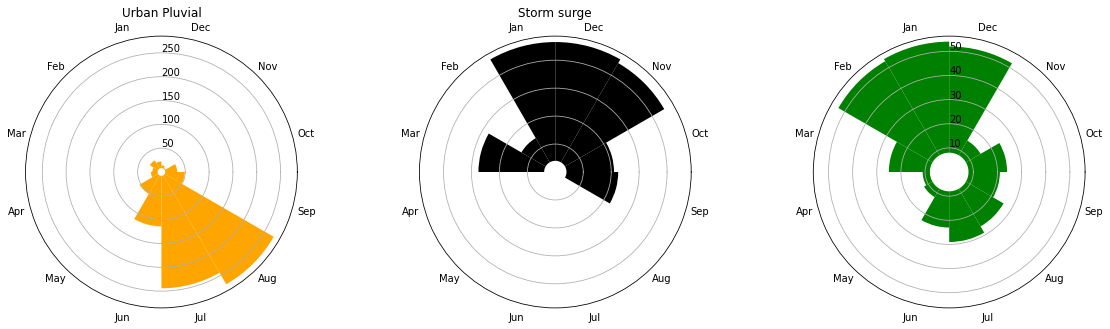

In [51]:
##########################################
####### Circular Histograms ##############
##########################################
D =  data["Startdato"].dt.dayofyear # flood_index_day_of_year
theta = D*2*np.pi/365.25

N = 12
bottom = 8
max_height = 4

circular_bins = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
circular_bins = np.append(circular_bins, 2 * np.pi)
circular_plot_position = circular_bins + 0.5*np.diff(circular_bins)[0]
circular_plot_position = circular_plot_position[:-1]
circular_plot_position = circular_plot_position + 0.5*np.pi

count0, division0 = np.histogram(theta[flood_type_int==0], bins = list(circular_bins))
count1, division1 = np.histogram(theta[flood_type_int==1], bins = list(circular_bins))
count2, division2 = np.histogram(theta[flood_type_int==2], bins = list(circular_bins))

radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

fig = plt.figure(figsize=(20,5))
ax0 = plt.subplot(131, polar=True)
ax0.bar(circular_plot_position, count0, width=width, bottom=bottom, color="orange")
ax1 = plt.subplot(132, polar=True)
ax1.bar(circular_plot_position, count1, width=width, bottom=bottom, color="black")
ax2 = plt.subplot(133, polar=True)
ax2.bar(circular_plot_position, count2, width=width, bottom=bottom, color="green")

ax0.set_title("Urban Pluvial")
ax1.set_title("Storm surge")


ax0.set_rlabel_position(90)
ax1.set_rlabel_position(90)
ax2.set_rlabel_position(90)

ax0.xaxis.grid(False)
ax1.xaxis.grid(False)
ax2.xaxis.grid(False)

ax0.set_xticks(circular_plot_position - 0.5*np.pi)
ax1.set_xticks(circular_plot_position - 0.5*np.pi)
ax2.set_xticks(circular_plot_position - 0.5*np.pi)

ax0.set_xticklabels(['Oct', 'Nov', 'Dec',
                    'Jan', 'Feb', 'Mar', 
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',])
ax1.set_xticklabels(['Oct', 'Nov', 'Dec',
                    'Jan', 'Feb', 'Mar', 
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',])
ax2.set_xticklabels(['Oct', 'Nov', 'Dec',
                    'Jan', 'Feb', 'Mar', 
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',]);

In [62]:
count0

1      14
2      19
3      12
4      14
5      45
6     105
7     220
8     281
9      41
10     25
11      2
12      6
Name: Startdato, dtype: int64

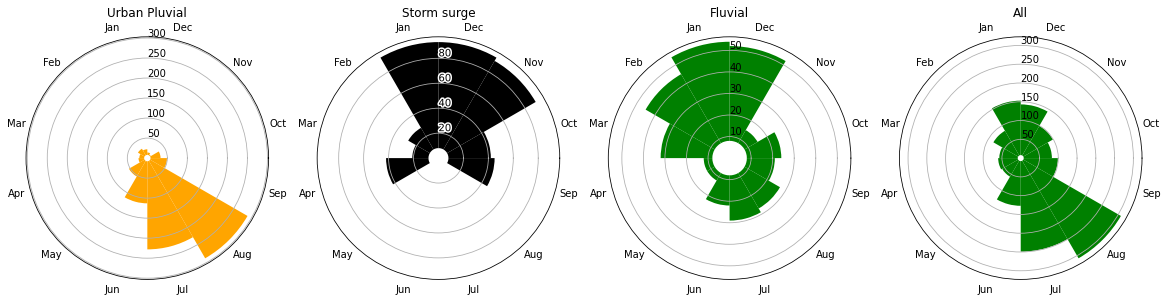

In [54]:
##########################################
####### Circular Histograms ##############
##########################################
N = 12
bottom = 8
max_height = 4

circular_bins = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
circular_bins = np.append(circular_bins, 2 * np.pi)
circular_plot_position = circular_bins + 0.5*np.diff(circular_bins)[0]
circular_plot_position = circular_plot_position[:-1]
circular_plot_position = circular_plot_position + 0.5*np.pi

month_of_event =  data["Startdato"].dt.month # the month of each event

count0 = month_of_event[flood_type_int==0].value_counts().sort_index()
count1 = month_of_event[flood_type_int==1].value_counts().sort_index()
count2 = month_of_event[flood_type_int==2].value_counts().sort_index()
count3 = month_of_event.value_counts().sort_index()

count0 = count0.reindex(list(range(count0.index.min(),count0.index.max()+1)),fill_value=0)
count1 = count1.reindex(list(range(count1.index.min(),count1.index.max()+1)),fill_value=0)
count2 = count2.reindex(list(range(count2.index.min(),count2.index.max()+1)),fill_value=0)
count3 = count3.reindex(list(range(count3.index.min(),count3.index.max()+1)),fill_value=0)

radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

fig = plt.figure(figsize=(20,5))
ax0 = plt.subplot(141, polar=True)
ax0.bar(circular_plot_position, count0.iloc[::-1], width=width, bottom=bottom, color="orange")
ax1 = plt.subplot(142, polar=True)
ax1.bar(circular_plot_position, count1.iloc[::-1], width=width, bottom=bottom, color="black")
ax2 = plt.subplot(143, polar=True)
ax2.bar(circular_plot_position, count2.iloc[::-1], width=width, bottom=bottom, color="green")
ax3 = plt.subplot(144, polar=True)
ax3.bar(circular_plot_position, count3.iloc[::-1], width=width, bottom=bottom, color="green")

ax0.set_title("Urban Pluvial")
ax1.set_title("Storm surge")
ax2.set_title("Fluvial")
ax3.set_title("All")

ax0.set_rlabel_position(90)
ax1.set_rlabel_position(90)
ax2.set_rlabel_position(90)
ax3.set_rlabel_position(90)

ax0.xaxis.grid(False)
ax1.xaxis.grid(False)
ax2.xaxis.grid(False)
ax3.xaxis.grid(False)

ax0.set_xticks(circular_plot_position - 0.5*np.pi)
ax1.set_xticks(circular_plot_position - 0.5*np.pi)
ax2.set_xticks(circular_plot_position - 0.5*np.pi)
ax3.set_xticks(circular_plot_position - 0.5*np.pi)

for label in ax1.get_yticklabels():
    label.set_color('black')  # Set the inner text color
    label.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'),  # Outline (white)
                            path_effects.Normal()])  # Normal effect inside the stroke

ax0.set_xticklabels(['Oct', 'Nov', 'Dec',
                    'Jan', 'Feb', 'Mar', 
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',])
ax1.set_xticklabels(['Oct', 'Nov', 'Dec',
                    'Jan', 'Feb', 'Mar', 
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',])
ax3.set_xticklabels(['Oct', 'Nov', 'Dec',
                    'Jan', 'Feb', 'Mar', 
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',])
ax2.set_xticklabels(['Oct', 'Nov', 'Dec',
                    'Jan', 'Feb', 'Mar', 
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',]);



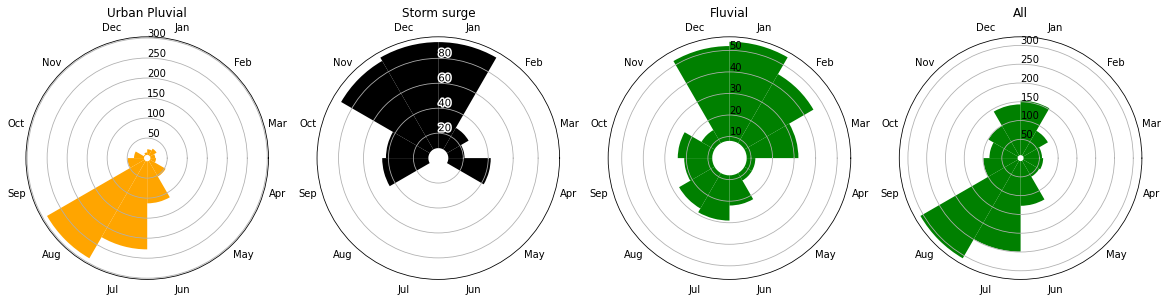

In [87]:
##########################################
####### Circular Histograms ##############
##########################################
N = 12
bottom = 8
max_height = 4

circular_bins = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
circular_bins = np.append(circular_bins, 2 * np.pi)
circular_plot_position = circular_bins + 0.5*np.diff(circular_bins)[0]
circular_plot_position = circular_plot_position[:-1]
circular_plot_position = circular_plot_position + 0.5*np.pi

month_of_event =  data["Startdato"].dt.month # the month of each event

count0 = month_of_event[flood_type_int==0].value_counts().sort_index()
count1 = month_of_event[flood_type_int==1].value_counts().sort_index()
count2 = month_of_event[flood_type_int==2].value_counts().sort_index()
count3 = month_of_event.value_counts().sort_index()

count0 = count0.reindex(list(range(count0.index.min(),count0.index.max()+1)),fill_value=0)
count1 = count1.reindex(list(range(count1.index.min(),count1.index.max()+1)),fill_value=0)
count2 = count2.reindex(list(range(count2.index.min(),count2.index.max()+1)),fill_value=0)
count3 = count3.reindex(list(range(count3.index.min(),count3.index.max()+1)),fill_value=0)

radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

fig = plt.figure(figsize=(20,5))
ax0 = plt.subplot(141, polar=True)
ax0.bar(circular_plot_position, count0.iloc[::-1], width=width, bottom=bottom, color="orange")
ax1 = plt.subplot(142, polar=True)
ax1.bar(circular_plot_position, count1.iloc[::-1], width=width, bottom=bottom, color="black")
ax2 = plt.subplot(143, polar=True)
ax2.bar(circular_plot_position, count2.iloc[::-1], width=width, bottom=bottom, color="green")
ax3 = plt.subplot(144, polar=True)
ax3.bar(circular_plot_position, count3.iloc[::-1], width=width, bottom=bottom, color="green")

ax0.set_title("Urban Pluvial")
ax1.set_title("Storm surge")
ax2.set_title("Fluvial")
ax3.set_title("All")

ax0.set_rlabel_position(90)
ax1.set_rlabel_position(90)
ax2.set_rlabel_position(90)
ax3.set_rlabel_position(90)

ax0.xaxis.grid(False)
ax1.xaxis.grid(False)
ax2.xaxis.grid(False)
ax3.xaxis.grid(False)

ax0.set_xticks(circular_plot_position - 0.5*np.pi)
ax1.set_xticks(circular_plot_position - 0.5*np.pi)
ax2.set_xticks(circular_plot_position - 0.5*np.pi)
ax3.set_xticks(circular_plot_position - 0.5*np.pi)

for label in ax1.get_yticklabels():
    label.set_color('black')  # Set the inner text color
    label.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'),  # Outline (white)
                            path_effects.Normal()])  # Normal effect inside the stroke

ax0.set_xticklabels(['Mar', 'Feb', 'Jan',
                     'Dec', 'Nov', 'Oct',
                    'Sep', 'Aug', 'Jul',
                    'Jun', 'May', 'Apr']);
ax1.set_xticklabels(['Mar', 'Feb', 'Jan',
                     'Dec', 'Nov', 'Oct',
                    'Sep', 'Aug', 'Jul',
                    'Jun', 'May', 'Apr']);
ax2.set_xticklabels(['Mar', 'Feb', 'Jan',
                     'Dec', 'Nov', 'Oct',
                    'Sep', 'Aug', 'Jul',
                    'Jun', 'May', 'Apr']);
ax3.set_xticklabels(['Mar', 'Feb', 'Jan',
                     'Dec', 'Nov', 'Oct',
                    'Sep', 'Aug', 'Jul',
                    'Jun', 'May', 'Apr']);

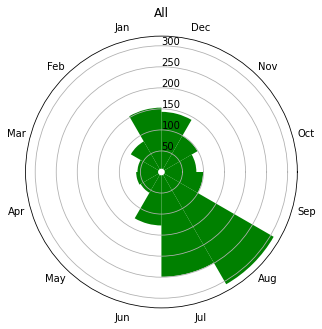

In [44]:
##########################################
####### Circular Histograms ##############
##########################################
N = 12
bottom = 8
max_height = 4

circular_bins = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
circular_bins = np.append(circular_bins, 2 * np.pi)
circular_plot_position = circular_bins + 0.5*np.diff(circular_bins)[0]
circular_plot_position = circular_plot_position[:-1]
circular_plot_position = circular_plot_position + 0.5*np.pi

month_of_event =  data["Startdato"].dt.month # the month of each event

count3 = month_of_event.value_counts().sort_index()
count3 = count3.reindex(list(range(count3.index.min(),count3.index.max()+1)),fill_value=0)

radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

fig = plt.figure(figsize=(20,5))
ax3 = plt.subplot(111, polar=True)
ax3.bar(circular_plot_position, count3, width=width, bottom=bottom, color="green")

ax3.set_title("All")
ax3.set_rlabel_position(90)
ax3.xaxis.grid(False)
ax3.set_xticks(circular_plot_position - 0.5*np.pi)
ax3.set_xticklabels(['Oct', 'Nov', 'Dec',
                    'Jan', 'Feb', 'Mar', 
                    'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep',]);